In [1]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np

In [2]:
# Load df from disk

df = pd.read_csv("speeches/data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019",\r\n transcript-innerTranscripttranscript...,State of the Union,Republican
1,1,Donald Trump,"January 30, 2018",\r\n transcript-innerTranscripttranscript...,State of the Union,Republican
2,2,Donald Trump,"January 20, 2017",\r\n transcript-innerTranscripttranscript...,Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016",\r\n transcript-innerTranscripttranscript...,State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015",\r\n transcript-innerTranscripttranscript...,State of the Union,Democrat


In [4]:
len(df)

108

In [5]:
df["Speech"] = df["Speech"].str.replace("transcript-inner", "").str.replace(u'\xa0', u' ')

In [6]:
print(df['Speech'].loc[9])


      Transcript
      Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

      Tonight I want to begin by congratulating the men and women of the 112th Congress, as well as your new Speaker, John Boehner.  (Applause.)  And as we mark this occasion, we’re also mindful of the empty chair in this chamber, and we pray for the health of our colleague -- and our friend -– Gabby Giffords.  (Applause.)

      It’s no secret that those of us here tonight have had our differences over the last two years.  The debates have been contentious; we have fought fiercely for our beliefs.  And that’s a good thing.  That’s what a robust democracy demands.  That’s what helps set us apart as a nation.

      But there’s a reason the tragedy in Tucson gave us pause. Amid all the noise and passion and rancor of our public debate, Tucson reminded us that no matter who we are or where we come from, each of us is a part of something greater -– something more cons

In [9]:
# drops party orientation that isn't Rep or Dem
df2 = df.drop(df.index[92:108])

In [10]:
len(df2)

92

In [11]:
# creates party dummy
Party_dummy = pd.get_dummies(df2['Party'], drop_first=True)
Party_dummy

,Republican
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [12]:
df2['Republican'] = Party_dummy

In [13]:
df2.head()
print(len(df2))

92


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Number of words in each speech
df2["word_count"] = df2["Speech"].apply(lambda x : len(x))
#Number of unique words in each speech
df2["unique_word"] = df2["Speech"].apply(lambda x : len(set(x.lower().split()) ) )
#Number of unique words ratio in each speech
df2["unique_word_ratio"] = df2.apply(lambda x : x["unique_word"]/x["word_count"] ,axis=1)
#Extracting year alone from the Date column
df2["year"] = df2["Date"].apply(lambda x : int(x.split(",")[2])  if len(x.split(","))==3 else int(x.split(",")[1]) )
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year
0,0,Donald Trump,"February 05, 2019",\r\n Transcript\r\n \r\nMadam Speake...,State of the Union,Republican,1,30958,1910,0.061696,2019
1,1,Donald Trump,"January 30, 2018","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Republican,1,30550,1906,0.062390,2018
2,2,Donald Trump,"January 20, 2017",\r\n Transcript\r\n Chief Justice Ro...,Inaugural Address,Republican,1,8561,622,0.072655,2017
3,3,Barack Obama,"January 12, 2016","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,35420,1931,0.054517,2016
4,4,Barack Obama,"January 20, 2015","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,40487,2068,0.051078,2015


In [17]:
print(df2['Party'])

0     Republican
1     Republican
2     Republican
3       Democrat
4       Democrat
5       Democrat
6       Democrat
7       Democrat
8       Democrat
9       Democrat
10      Democrat
11      Democrat
12    Republican
13    Republican
14    Republican
15    Republican
16    Republican
17    Republican
18    Republican
19    Republican
20    Republican
21      Democrat
22      Democrat
23      Democrat
24      Democrat
25      Democrat
26      Democrat
27      Democrat
28    Republican
29    Republican
         ...    
62      Democrat
63      Democrat
64      Democrat
65      Democrat
66      Democrat
67      Democrat
68    Republican
69    Republican
70    Republican
71    Republican
72    Republican
73    Republican
74    Republican
75      Democrat
76      Democrat
77           NaN
78    Republican
79    Republican
80    Republican
81      Democrat
82    Republican
83      Democrat
84    Republican
85    Republican
86    Republican
87    Republican
88    Republican
89    Republic

Text(0, 0.5, 'Word count')

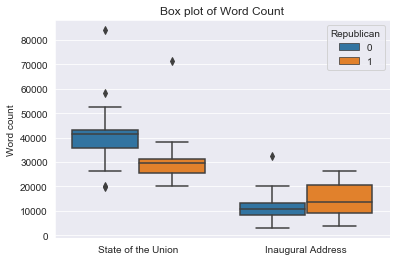

In [19]:
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Republican', data=df2)
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

In [20]:
max(df2['word_count'])
min(df2['word_count'])

3037

In [21]:
# state of the union dataset
df_by_speech = df2.groupby('Type').describe().head()

In [ ]:
df_by_speech['word_count']
with open('mytable.tex','w') as tf:
    tf.write(df_by_speech.to_latex())